# CONTENT BASED FILTERING 
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

# Input movie yang dicari rekomendasi setelahnya

In [1]:
USER_MOVIE = 'Ada Apa dengan Cinta 2'

# Import Library

In [2]:
import pandas as pd

# Import Dataset

In [3]:
df = pd.read_csv('../data/apa.csv')
df.head()

,movie,jenis,genre,rating,durasi
0,Ada Apa dengan Cinta 2,indo,romance,4,60
1,Gundala,indo,action,3,100
2,Dilan 1991,indo,romance,5,90
3,Bumi Manusia,indo,romance,5,60
4,Dua Garis Biru,indo,romance,1,80


In [4]:
film = list(df.movie.values)

# Menjadikan nama movie sebagai index

In [5]:
df.set_index('movie', inplace=True)
df.head()

,jenis,genre,rating,durasi
movie,,,,
Ada Apa dengan Cinta 2,indo,romance,4,60
Gundala,indo,action,3,100
Dilan 1991,indo,romance,5,90
Bumi Manusia,indo,romance,5,60
Dua Garis Biru,indo,romance,1,80


# Mengencoder kolom yang bertipe object

In [6]:
from sklearn.preprocessing import LabelEncoder
#df['movie'] = LabelEncoder().fit_transform(df['movie2'])
df['jenis'] = LabelEncoder().fit_transform(df['jenis'])
df['genre'] = LabelEncoder().fit_transform(df['genre'])
df.head()

,jenis,genre,rating,durasi
movie,,,,
Ada Apa dengan Cinta 2,0,2,4,60
Gundala,0,0,3,100
Dilan 1991,0,2,5,90
Bumi Manusia,0,2,5,60
Dua Garis Biru,0,2,1,80


***
Encoder digunakan untuk mengubah data yang bertipe object menjadi data numerik
***

# MinMax Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
col2 = df.columns
scaler = MinMaxScaler().fit_transform(df)
df3 = pd.DataFrame(scaler, columns = col2)
df3

,jenis,genre,rating,durasi
0,0.0,1.0,0.75,0.000000
1,0.0,0.0,0.50,0.666667
2,0.0,1.0,1.00,0.500000
3,0.0,1.0,1.00,0.000000
4,0.0,1.0,0.00,0.333333
5,1.0,0.0,0.25,0.500000
6,1.0,0.5,0.75,0.666667
7,1.0,1.0,0.25,1.000000
8,1.0,0.0,0.50,0.666667
9,1.0,0.0,0.75,0.333333


***
MinMax Scaler digunakan untuk mentransform features menjadi nilai yang biasanya nilainya range 0 sampai 1
<br>Hal ini dimaksudkan agar nilai yang ada pada semua feature tidak berbeda jauh gapnya
***

# Consine Similarity

In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df_c = cosine_similarity(df3)

In [9]:
df_a = pd.DataFrame(df_c,columns = film)
df_a['movie'] = film
df_a.set_index('movie', inplace=True)
df_a

,Ada Apa dengan Cinta 2,Gundala,Dilan 1991,Bumi Manusia,Dua Garis Biru,Avengers: End Game,The Lion King,Aladin,Spiderman: Far From Home,Captain Marvel
movie,,,,,,,,,,
Ada Apa dengan Cinta 2,1.000000,0.360000,0.933333,0.989949,0.758947,0.130931,0.565794,0.542857,0.230466,0.347845
Gundala,0.360000,1.000000,0.666667,0.424264,0.252982,0.480079,0.654546,0.542857,0.640184,0.553975
Dilan 1991,0.933333,0.666667,1.000000,0.942809,0.737865,0.290957,0.702620,0.666667,0.426790,0.472382
Bumi Manusia,0.989949,0.424264,0.942809,1.000000,0.670820,0.154303,0.588348,0.505076,0.271607,0.409939
Dua Garis Biru,0.758947,0.252982,0.737865,0.670820,1.000000,0.138013,0.456070,0.722806,0.161955,0.081480
Avengers: End Game,0.130931,0.480079,0.290957,0.154303,0.138013,1.000000,0.883632,0.779350,0.977898,0.913682
The Lion King,0.565794,0.654546,0.702620,0.588348,0.456070,0.883632,1.000000,0.895445,0.930389,0.918296
Aladin,0.542857,0.542857,0.666667,0.505076,0.722806,0.779350,0.895445,1.000000,0.786512,0.671763
Spiderman: Far From Home,0.230466,0.640184,0.426790,0.271607,0.161955,0.977898,0.930389,0.786512,1.000000,0.948472


***
Consine similarity digunakan untuk mencari similarity setiap movie berdasarkan feature feature yang ada pada setiap movie
<br> semakin mendekati 1 nilai similaritynya berarti kedua movie tersebut sangat berkorelasi 
***

# Menampilkan korelasi movie dalam heatmap

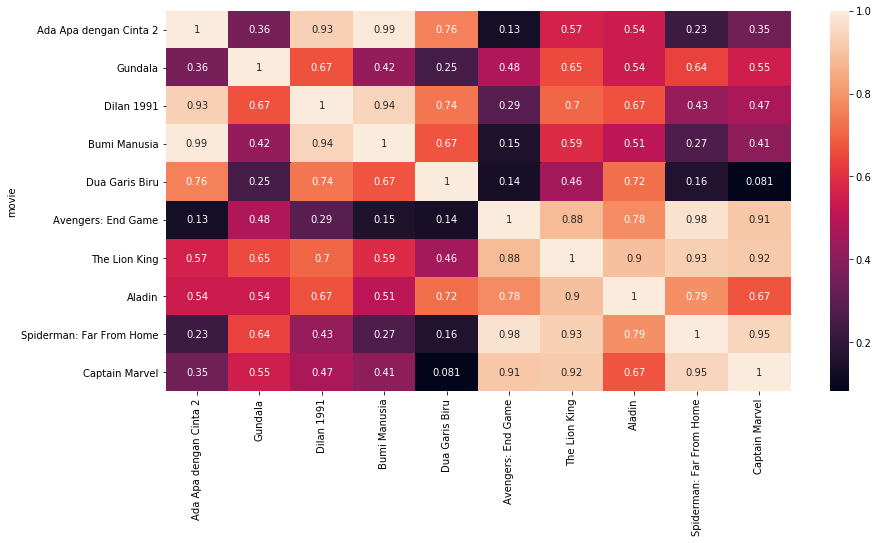

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))
sns.heatmap(df_a, annot=True)

# Urutan Film yang direkomendasikan

In [12]:
final_result = df_a[[USER_MOVIE]]
final_result = final_result[[USER_MOVIE]].loc[(final_result[USER_MOVIE]<1)]
final_result = final_result.sort_values(by=USER_MOVIE, ascending=False)
final_result

,Ada Apa dengan Cinta 2
movie,
Bumi Manusia,0.989949
Dilan 1991,0.933333
Dua Garis Biru,0.758947
The Lion King,0.565794
Aladin,0.542857
Gundala,0.360000
Captain Marvel,0.347845
Spiderman: Far From Home,0.230466
Avengers: End Game,0.130931


***
Urutan film dari yang paling direkomendasikan sampai yang kurang direkomendasikan untuk user dapat dilihat pada tabel diatas. <br>Terlihat bahwa setelah menonton ada apa dengan cinta 2, user sangat direkomendasikan menonton film Bumi Manusia
***

# FIlm yang paling direkomendasikan

In [13]:
top_recomend = final_result.head(1)
top_recomend = top_recomend.reset_index()
top_recomend = top_recomend['movie'].tolist()
print ('Film yang direkomendasikan setelah', USER_MOVIE,'adalah', top_recomend)

Film yang direkomendasikan setelah Ada Apa dengan Cinta 2 adalah ['Bumi Manusia']


# Kesimpulan
**Content Based Filtering** merekomendasikan film berdasarkan similarity dari feature film yang direkomendasikan dengan feature film yang telah ditonton user sebelumnya. pada case ini similarity dari masing masing movie dilihat dari similarity jenis, genre, rating, durasi dari masing-masing film.
<br>pada case ini Jika user telah menonton film **Ada Apa dengan Cinta 2**, maka rekomendasi film selanjutnya untuk user adalah **Bumi Manusia**